# EDA - Stress Level Dataset

## Objective

Perform a comprehensive exploratory data analysis of the Stress Level dataset to:
- Understand student stress factors and their relationships
- Analyze relationships between academic, social, and health factors with stress levels
- Identify patterns in stress indicators (anxiety, depression, self-esteem)
- Detect missing values, outliers, and data quality issues
- Prepare the dataset for feature engineering and merging with other datasets

## Dataset

**File:** `04_stress_level_dataset.csv`  
**Source:** Student Stress Level Dataset  
**Key Variables:** anxiety_level, self_esteem, depression, academic_performance, study_load, stress_level (target)

## 1. Imports and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
from scipy.stats import f_oneway

In [2]:
# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Path configuration
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
RAW_DATA_DIR = BASE_DIR / 'datasets' / 'raw'
PROCESSED_DATA_DIR = BASE_DIR / 'datasets' / 'processed'

# Create processed directory if it doesn't exist
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)

## 2. Data Loading

In [3]:
df = pd.read_csv(RAW_DATA_DIR / '04_stress_level_dataset.csv')
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2


## 3. General Information and Data Quality
Examine data types, missing values, and basic statistics

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
print(df.describe())

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

In [6]:
print(df.isnull().any())

anxiety_level                   False
self_esteem                     False
mental_health_history           False
depression                      False
headache                        False
blood_pressure                  False
sleep_quality                   False
breathing_problem               False
noise_level                     False
living_conditions               False
safety                          False
basic_needs                     False
academic_performance            False
study_load                      False
teacher_student_relationship    False
future_career_concerns          False
social_support                  False
peer_pressure                   False
extracurricular_activities      False
bullying                        False
stress_level                    False
dtype: bool


In [7]:
# duplicate check
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 0


### 4. Target variables analysis: Stress level
Analyze the distribution and characteristics of the target variable.


Distribution:
 Stress_Level  Count  Percentage
            0    373   33.909091
            1    358   32.545455
            2    369   33.545455

Statistics:
   Mean: 1.00
   Median: 1.00
   Std: 0.82
   Min: 0
   Max: 2


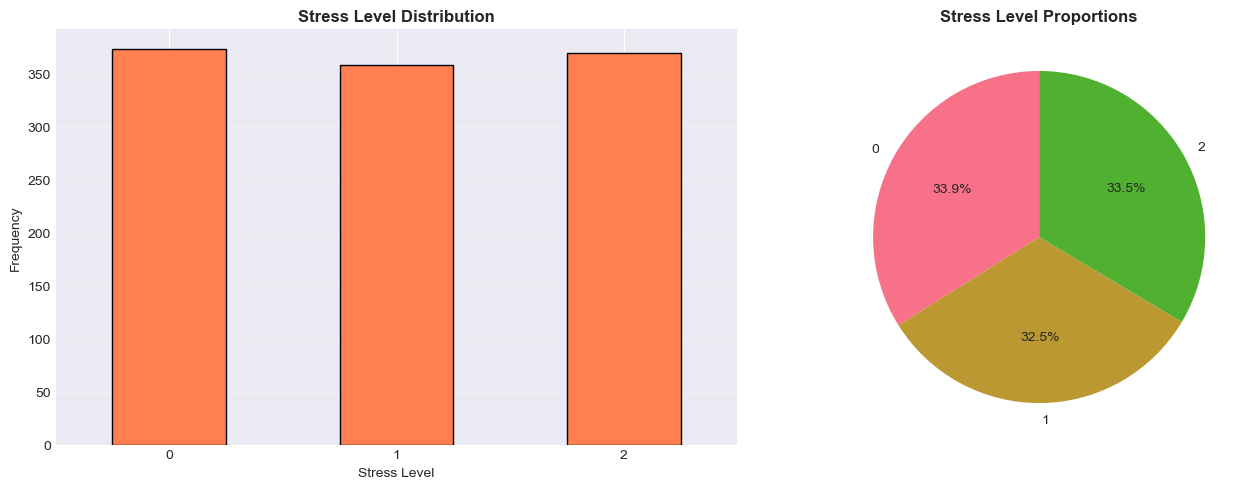

In [9]:
if 'stress_level' in df.columns:
    print('Distribution:')
    stress_dist = df['stress_level'].value_counts().sort_index()
    stress_dist_pct = df['stress_level'].value_counts(normalize=True).sort_index() * 100

    stress_summary = pd.DataFrame({
        'Stress_Level': stress_dist.index,
        'Count': stress_dist.values,
        'Percentage': stress_dist_pct.values
    })
    print(stress_summary.to_string(index=False))
    print("\nStatistics:")
    print(f"   Mean: {df['stress_level'].mean():.2f}")
    print(f"   Median: {df['stress_level'].median():.2f}")
    print(f"   Std: {df['stress_level'].std():.2f}")
    print(f"   Min: {df['stress_level'].min()}")
    print(f"   Max: {df['stress_level'].max()}")
    

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    stress_dist.plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
    axes[0].set_title('Stress Level Distribution', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('Stress Level')
    axes[0].set_ylabel('Frequency')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
    axes[0].grid(True, alpha=0.3, axis='y')

    stress_dist.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Stress Level Proportions', fontweight='bold', fontsize=12)
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("Stress level column not found in the dataset.")
    
    

### 5. Numerical Variables Analysis
Analyze distributions, statics, and relationships of numerical variables.

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying',
 'stress_level']

In [11]:
if 'stress_level' in numeric_cols:
    numeric_cols.remove('stress_level')

print(f'Numerical variables: ({len(numeric_cols)})')

Numerical variables: (20)


In [12]:
numeric_cols

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying']

In [13]:
# descriptive statistics
print("Descriptive Statistics:")
print(df[numeric_cols].describe())

Descriptive Statistics:
       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.00

In [14]:
additional_stats = []
for col in numeric_cols:
    additional_stats.append({
        'Variable': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Std': df[col].std(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurtosis(),
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Range': df[col].max() - df[col].min(),
        'CV': (df[col].std() / df[col].mean()) * 100 if df[col].mean() != 0 else 0
    })

stats_df = pd.DataFrame(additional_stats)
print(stats_df.round(2).to_string(index=False))

                    Variable  Mean  Median  Std  Skewness  Kurtosis  Min  Max  Range     CV
               anxiety_level 11.06    11.0 6.12     -0.08     -1.09    0   21     21  55.29
                 self_esteem 17.78    19.0 8.94     -0.40     -1.06    0   30     30  50.31
       mental_health_history  0.49     0.0 0.50      0.03     -2.00    0    1      1 101.51
                  depression 12.56    12.0 7.73      0.22     -0.99    0   27     27  61.54
                    headache  2.51     3.0 1.41      0.27     -1.00    0    5      5  56.19
              blood_pressure  2.18     2.0 0.83     -0.35     -1.47    1    3      2  38.21
               sleep_quality  2.66     2.5 1.55      0.18     -1.32    0    5      5  58.21
           breathing_problem  2.75     3.0 1.40     -0.00     -1.06    0    5      5  50.87
                 noise_level  2.65     3.0 1.33      0.21     -0.70    0    5      5  50.14
           living_conditions  2.52     2.0 1.12      0.02     -0.50    0    5   

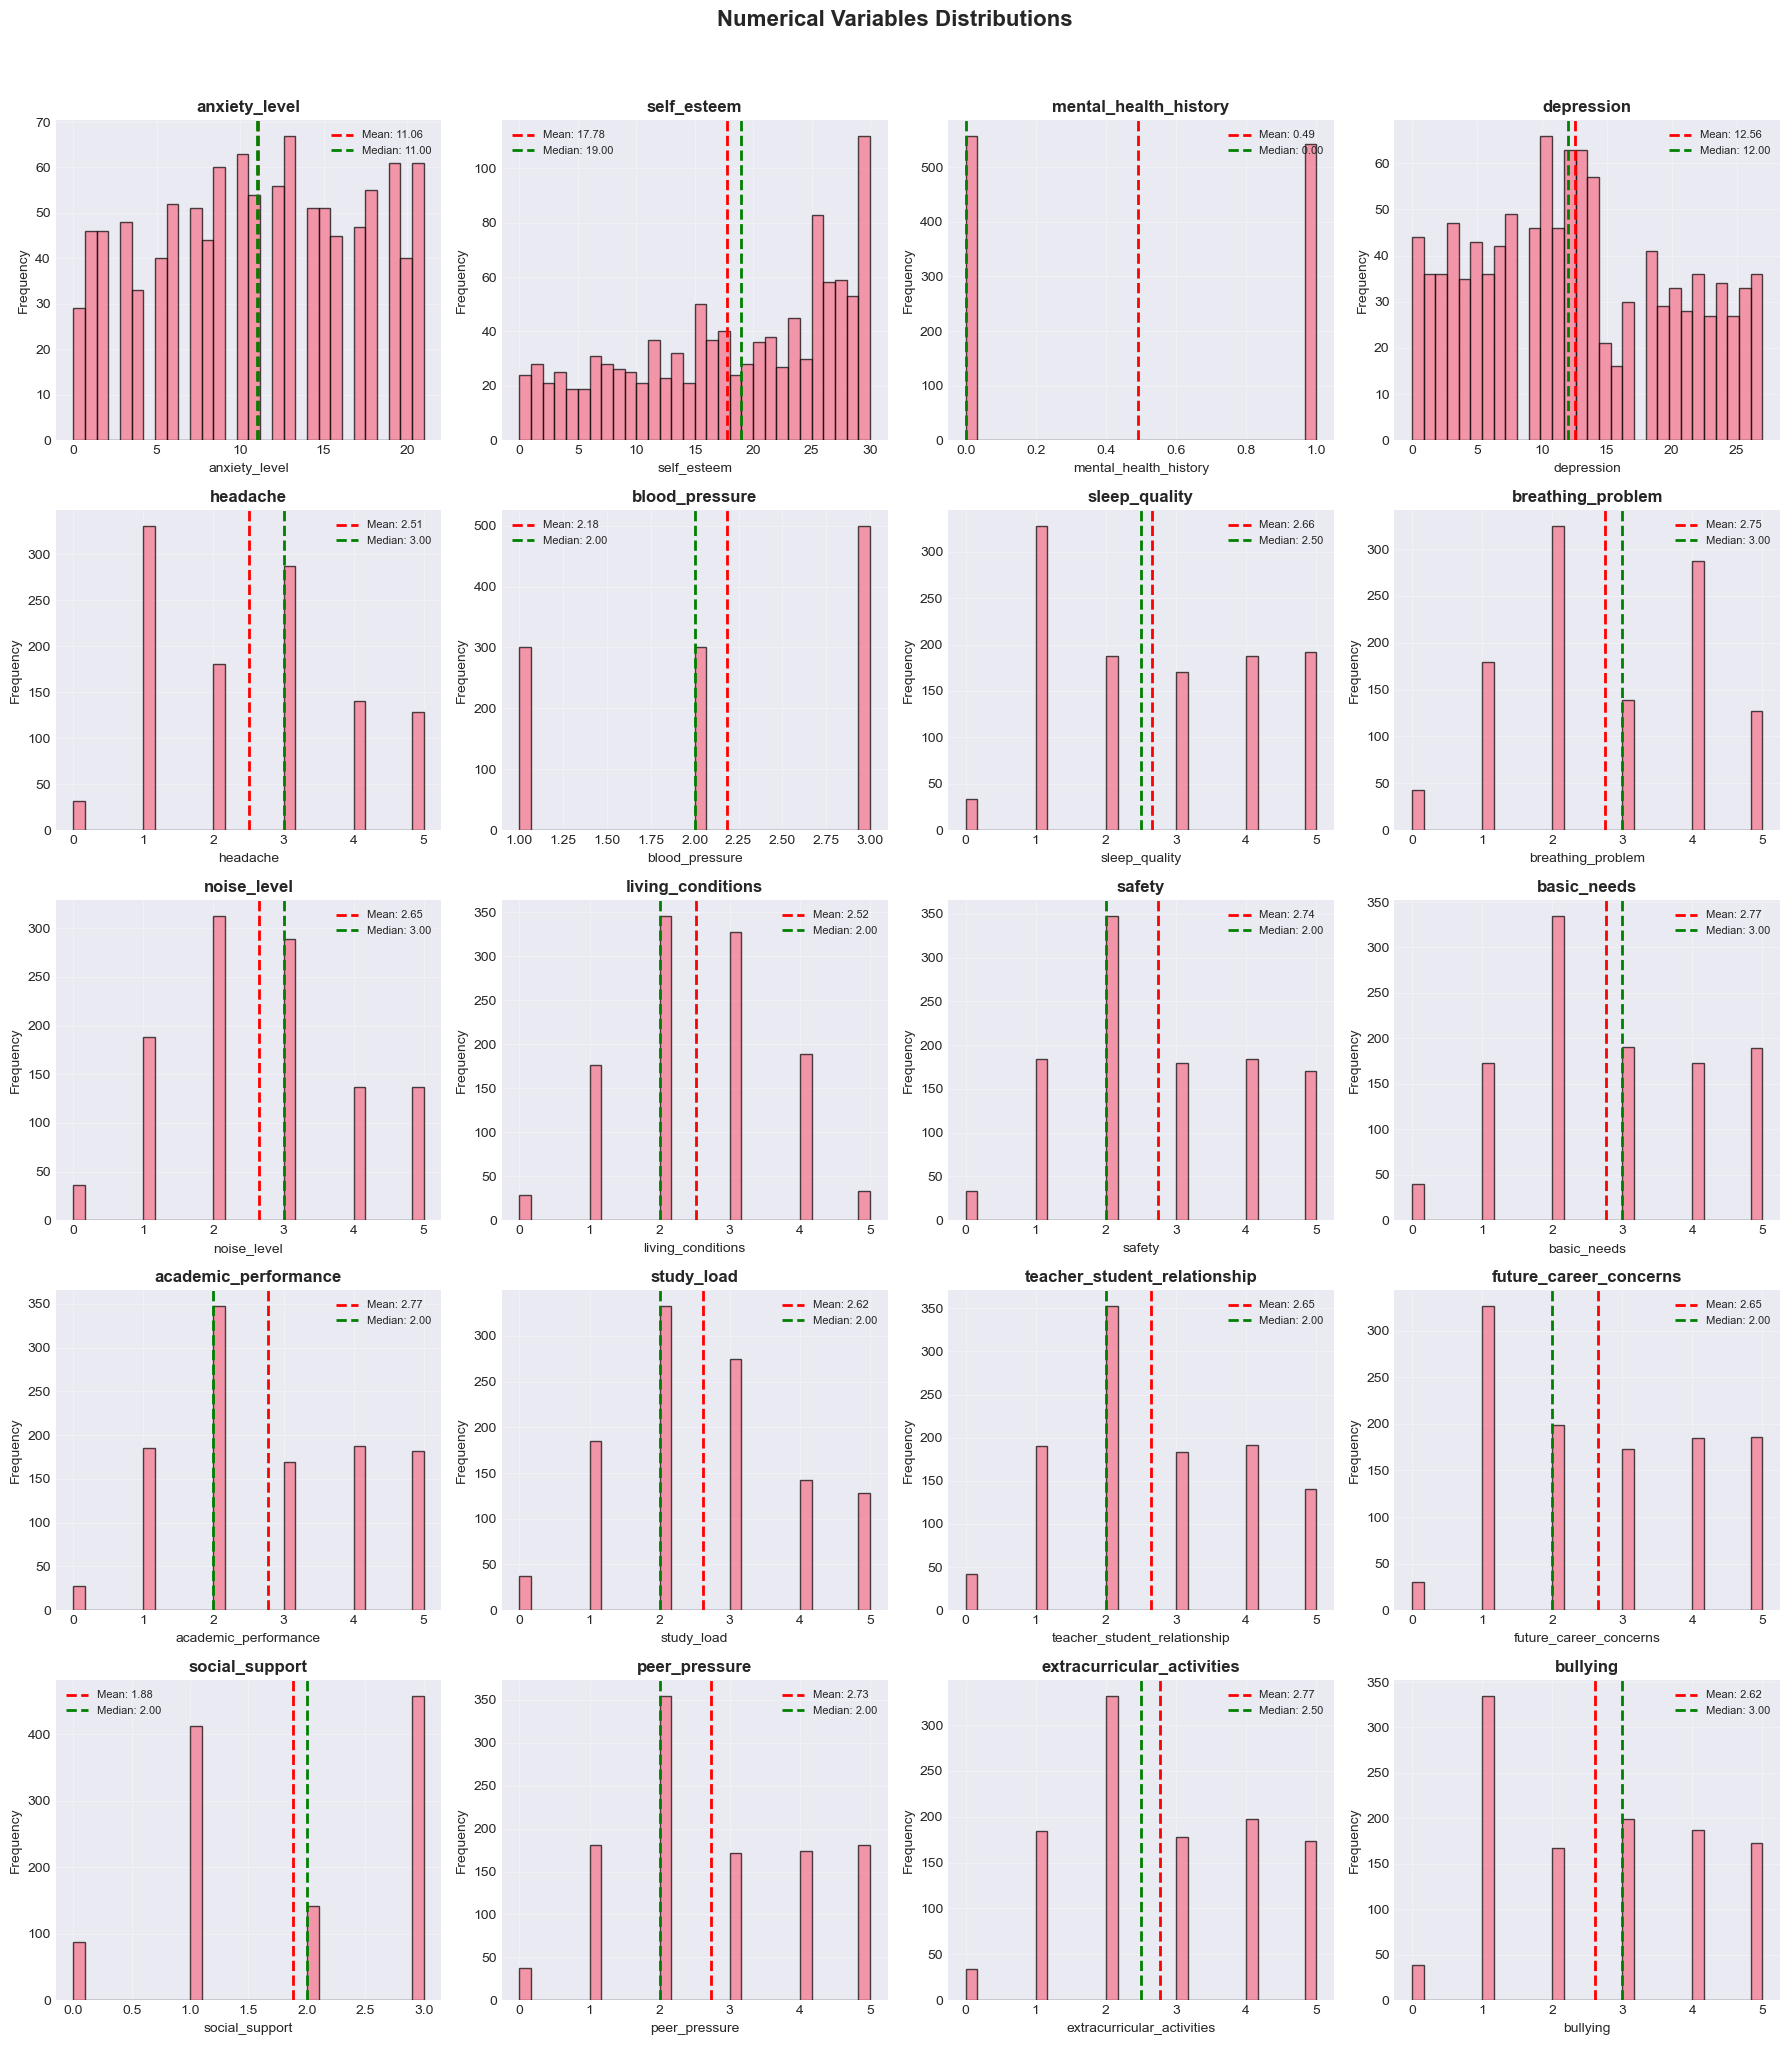

In [20]:
# Visualizations
n_vars = len(numeric_cols)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_vars == 1 else axes

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Numerical Variables Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### 6. Correlation Analysis
Analyze correlations between variables and with the target variable (stress_level).

In [22]:
#Correlation with target variable
if 'stress_level' in df.columns:
    print("\n📊 Correlation with Stress Level:")
    corr_with_target = df[numeric_cols + ['stress_level']].corr()['stress_level'].sort_values(key=abs, ascending=False)
    corr_with_target = corr_with_target.drop('stress_level')
    
    corr_df = pd.DataFrame({
        'Variable': corr_with_target.index,
        'Correlation': corr_with_target.values,
        'Abs_Correlation': corr_with_target.abs().values
    }).sort_values('Abs_Correlation', ascending=False)
    
    print(corr_df.to_string(index=False))
    
    # Strong correlations (> 0.5 or < -0.5)
    strong_corr = corr_df[corr_df['Abs_Correlation'] > 0.5]
    if len(strong_corr) > 0:
        print("\n Strong correlations with Stress Level (|r| > 0.5):")
        print(strong_corr.to_string(index=False))
    else:
        print("\n No strong correlations found (|r| > 0.5)")



📊 Correlation with Stress Level:
                    Variable  Correlation  Abs_Correlation
                 self_esteem    -0.756195         0.756195
                    bullying     0.751162         0.751162
               sleep_quality    -0.749068         0.749068
      future_career_concerns     0.742619         0.742619
               anxiety_level     0.736795         0.736795
                  depression     0.734379         0.734379
        academic_performance    -0.720922         0.720922
                    headache     0.713484         0.713484
                      safety    -0.709602         0.709602
                 basic_needs    -0.708968         0.708968
  extracurricular_activities     0.692977         0.692977
               peer_pressure     0.690684         0.690684
teacher_student_relationship    -0.680163         0.680163
                 noise_level     0.663371         0.663371
       mental_health_history     0.648644         0.648644
                  stud


Full Correlation Matrix:


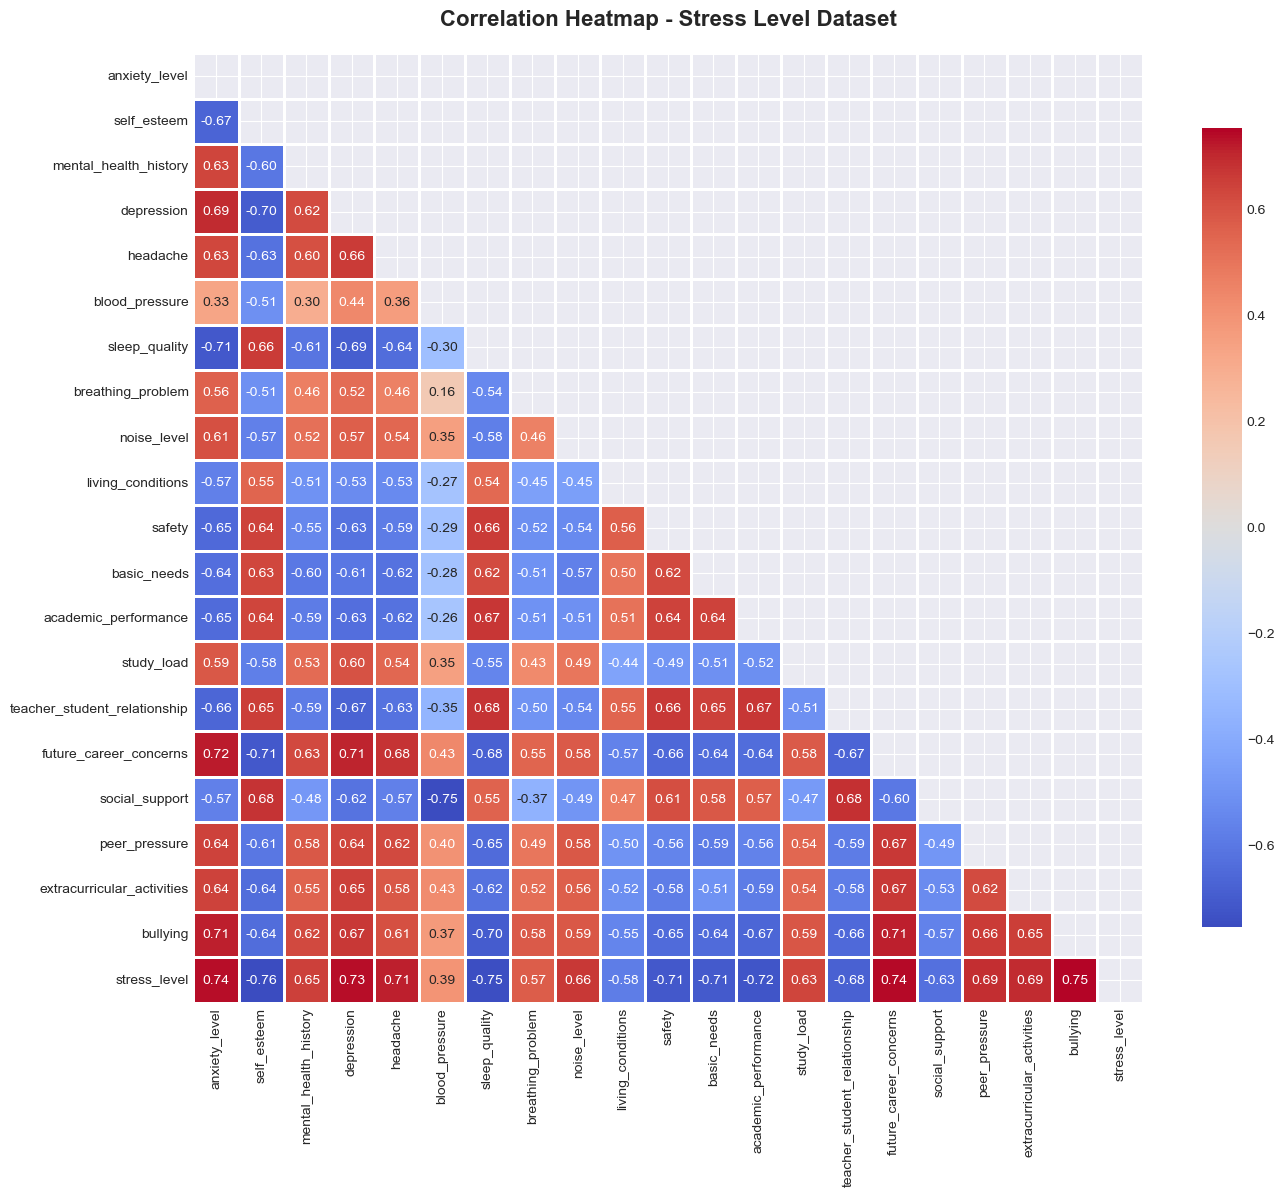

In [23]:

print("\nFull Correlation Matrix:")
corr_matrix = df[numeric_cols + ['stress_level']].corr()

# Heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Stress Level Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [24]:
print("\n Highly Correlated Feature Pairs (|r| > 0.75):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.75:
            high_corr_pairs.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
    print("\nThese highly correlated features may cause multicollinearity issues")
else:
    print(" No highly correlated feature pairs found (|r| > 0.75)")


 Highly Correlated Feature Pairs (|r| > 0.75):
          Var1           Var2  Correlation
   self_esteem   stress_level    -0.756195
blood_pressure social_support    -0.752531
      bullying   stress_level     0.751162

These highly correlated features may cause multicollinearity issues


### 7. Analysis by Stress Level categories
Analyze how different variables vary across stress level categories

ANALYSIS BY STRESS LEVEL

 Mean values by Stress Level:
              anxiety_level  self_esteem  mental_health_history  depression  \
stress_level                                                                  
0                      5.43        25.25                   0.10        6.01   
1                     11.43        19.26                   0.49       11.87   
2                     16.40         8.78                   0.89       19.83   

              headache  blood_pressure  sleep_quality  breathing_problem  \
stress_level                                                               
0                 1.31            2.20           4.13               1.70   
1                 2.46            1.32           2.53               2.93   
2                 3.76            3.00           1.30               3.65   

              noise_level  living_conditions  safety  basic_needs  \
stress_level                                                        
0                    1.65    

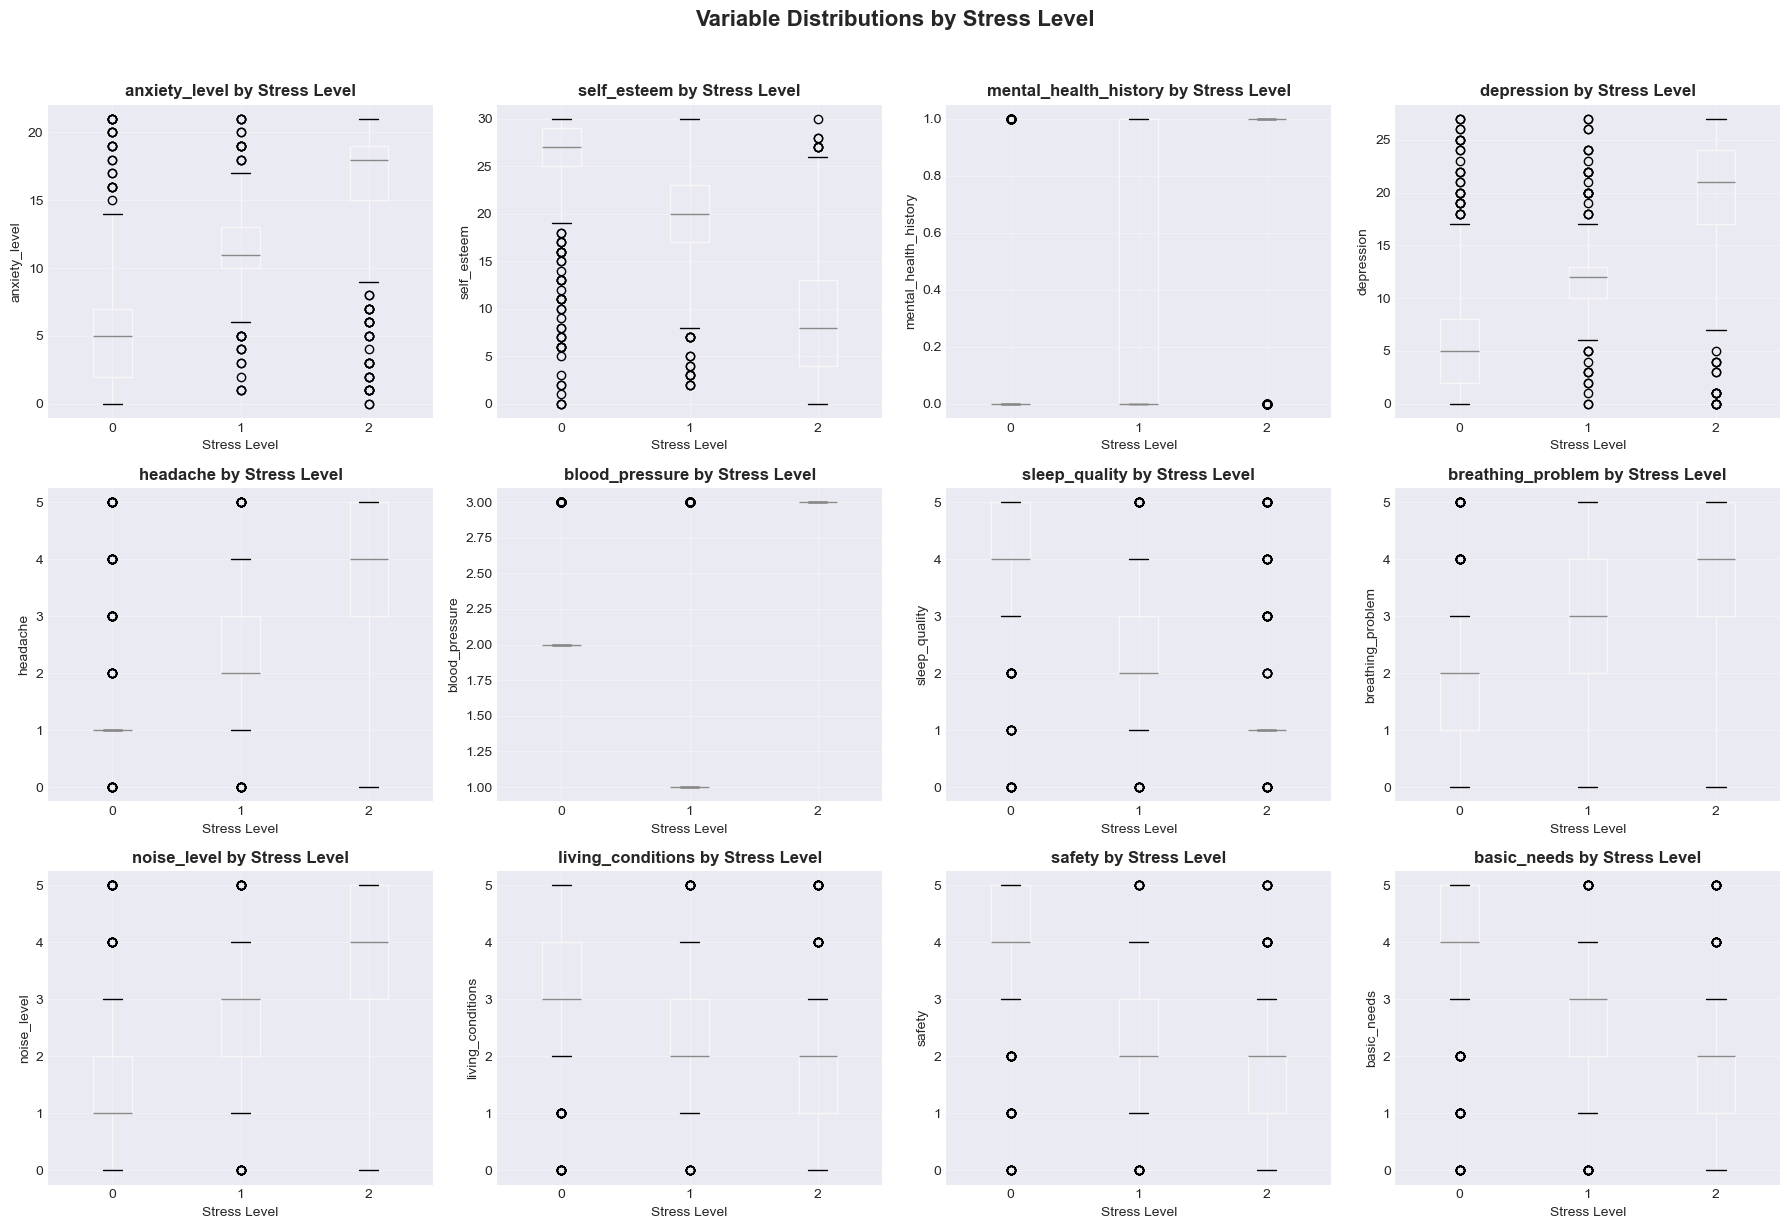

In [26]:
print("="*60)
print("ANALYSIS BY STRESS LEVEL")
print("="*60)

if 'stress_level' in df.columns:
    # Group by stress level
    print("\n Mean values by Stress Level:")
    means_by_stress = df.groupby('stress_level')[numeric_cols].mean()
    print(means_by_stress.round(2))
    
    # Statistical test (ANOVA) for each variable
    print("\n Statistical Tests (ANOVA) - Differences by Stress Level:")
    anova_results = []
    
    for col in numeric_cols:
        groups = [df[df['stress_level'] == level][col].dropna() 
                 for level in sorted(df['stress_level'].unique())]
        
        if len(groups) > 1 and all(len(g) > 0 for g in groups):
            f_stat, p_value = f_oneway(*groups)
            
            # Calculate effect size (eta squared)
            overall_mean = df[col].mean()
            between_var = sum(len(g) * (g.mean() - overall_mean)**2 for g in groups) / (len(groups) - 1) if len(groups) > 1 else 0
            within_var = sum((len(g) - 1) * g.var() for g in groups) / (len(df) - len(groups)) if len(df) > len(groups) else 0
            eta_squared = between_var / (between_var + within_var) if (between_var + within_var) > 0 else 0
            
            anova_results.append({
                'Variable': col,
                'F_statistic': f_stat,
                'P_value': p_value,
                'Eta_Squared': eta_squared,
                'Significant': 'Yes' if p_value < 0.05 else 'No'
            })
    
    anova_df = pd.DataFrame(anova_results).sort_values('P_value')
    print(anova_df.round(4).to_string(index=False))
    
    # Visualizations
    key_vars = numeric_cols[:12]  # Select first 12 for visualization
    n_vars = len(key_vars)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_vars == 1 else axes
    
    for i, col in enumerate(key_vars):
        if i < len(axes):
            df.boxplot(column=col, by='stress_level', ax=axes[i])
            axes[i].set_title(f'{col} by Stress Level', fontweight='bold')
            axes[i].set_xlabel('Stress Level')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
    
    # Hide extra subplots
    for i in range(len(key_vars), len(axes)):
        axes[i].axis('off')
    
    plt.suptitle('Variable Distributions by Stress Level', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## 8. Decision Rationale: Variable Removal


Based on comprehensive analysis of correlations, ANOVA tests, and category analysis, we need to remove variables that introduce noise or have low predictive power.

### Variable to Remove

#### **blood_pressure**

**Justification for Removal:**

1. **Low Correlation with Target**: 
   - Correlation with `stress_level`: r = 0.39 (moderate, much weaker than other variables)
   - Other variables show correlations of |r| > 0.60, making `blood_pressure` comparatively weak

2. **Non-Monotonic Pattern**:
   - Mean values by stress level: 2.20 (level 0) → 1.32 (level 1) → 3.00 (level 2)
   - This U-shaped pattern is counterintuitive and suggests the variable may be categorical/ordinal rather than continuous
   - Does not follow expected linear or monotonic relationship with stress

3. **High Multicollinearity**:
   - Strong negative correlation with `social_support`: r = -0.75
   - This multicollinearity can cause instability in linear models
   - `social_support` has stronger predictive power (r = -0.63 with target)

4. **Limited Range**:
   - Values range from 1 to 3 only (very limited variability)
   - Appears to be an ordinal/categorical variable coded as numeric
   - Low information content compared to other continuous variables

5. **Redundant Information**:
   - Other physiological variables (`headache`, `breathing_problem`) already capture physical stress symptoms
   - Does not add unique information beyond what other variables provide

### Variables to Keep

All other 19 variables are retained because they:
- Show strong correlations with target (|r| > 0.55)
- Demonstrate clear patterns across stress levels
- Provide unique information for stress prediction
- Contribute significantly to the model's predictive power

**Final Dataset**: 19 features + 1 target variable (`stress_level`)

## 10. Final Data Cleaning and Preparation

Remove the identified noisy variable and prepare the dataset for feature engineering and merging.

In [27]:
df_clean = df.copy()

In [28]:
# Remove duplicates
initial_shape = df_clean.shape
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_shape[0] - df_clean.shape[0]
print(f"\n1. Duplicates removed: {duplicates_removed} records")



1. Duplicates removed: 0 records


In [29]:
# columns to remove
columns_to_remove = ['blood_pressure']
columns_to_remove = [col for col in columns_to_remove if col in df_clean.columns]

In [30]:
print(f"\n2. Removing noisy variable ({len(columns_to_remove)}):")
for col in columns_to_remove:
    print(f"    {col}")
    print(f"      Reason: Low correlation with target (r=0.39), non-monotonic pattern,")
    print(f"              high multicollinearity with social_support (r=-0.75), limited range")

df_clean = df_clean.drop(columns=columns_to_remove, errors='ignore')
df_clean


2. Removing noisy variable (1):
    blood_pressure
      Reason: Low correlation with target (r=0.39), non-monotonic pattern,
              high multicollinearity with social_support (r=-0.75), limited range


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2


In [31]:
# missing values 
missing_summary = df_clean.isnull().sum()

In [32]:
if missing_summary.sum() > 0:
    print("   Remaining missing values:")
    for col, count in missing_summary[missing_summary > 0].items():
        print(f"      - {col}: {count} ({count/len(df_clean)*100:.1f}%)")
else:
    print("    No missing values")

    No missing values


In [33]:
print(df_clean.dtypes)

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


## 11. Feature Engineering

Create composite features and transformations to:
- Capture interactions between related variables
- Reduce dimensionality while maintaining information
- Create more interpretable indicators
- Improve model performance through domain knowledge

### Feature Engineering Strategy

1. **Mental Health Composite Index**: Combine anxiety and depression into a single mental health indicator
2. **Protective Factors Score**: Aggregate factors that protect against stress
3. **Stress Risk Score**: Aggregate factors that increase stress risk
4. **Environmental Quality Score**: Combine environmental and basic needs factors
5. **Academic Stress Index**: Combine academic-related stress factors
6. **Physical Symptoms Score**: Aggregate physical stress symptoms

In [35]:
# ============================================
# 1. MENTAL HEALTH COMPOSITE INDEX
# ============================================

if 'anxiety_level' in df_clean.columns and 'depression' in df_clean.columns:
    # Normalize to 0-1 scale first for fair combination
    anxiety_norm = (df_clean['anxiety_level'] - df_clean['anxiety_level'].min()) / (df_clean['anxiety_level'].max() - df_clean['anxiety_level'].min())
    depression_norm = (df_clean['depression'] - df_clean['depression'].min()) / (df_clean['depression'].max() - df_clean['depression'].min())
    
    df_clean['mental_health_index'] = (anxiety_norm + depression_norm) / 2
    
    print("\n Created: mental_health_index")
    print(f"   - Range: {df_clean['mental_health_index'].min():.3f} to {df_clean['mental_health_index'].max():.3f}")
    print(f"   - Mean: {df_clean['mental_health_index'].mean():.3f}")
    print(f"   - Correlation with stress_level: {df_clean[['mental_health_index', 'stress_level']].corr().iloc[0,1]:.3f}")

df_clean



 Created: mental_health_index
   - Range: 0.000 to 1.000
   - Mean: 0.496
   - Correlation with stress_level: 0.799


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_index
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1,0.537037
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,0.634921
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,0.544974
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,0.658730
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1,0.510582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1,0.521164
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2,0.362434
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0,0.150794
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,0.851852


In [36]:
# ============================================
# 2. PROTECTIVE FACTORS SCORE
# ============================================

protective_vars = ['self_esteem', 'sleep_quality', 'social_support', 'academic_performance']
available_protective = [var for var in protective_vars if var in df_clean.columns]

if len(available_protective) >= 2:
    # Normalize each variable to 0-1 scale
    normalized_protective = pd.DataFrame()
    for var in available_protective:
        var_min = df_clean[var].min()
        var_max = df_clean[var].max()
        if var_max > var_min:
            normalized_protective[var] = (df_clean[var] - var_min) / (var_max - var_min)
        else:
            normalized_protective[var] = 0
    
    df_clean['protective_factors_score'] = normalized_protective.mean(axis=1)
    
    print("\n Created: protective_factors_score")
    print(f"   - Variables included: {', '.join(available_protective)}")
    print(f"   - Range: {df_clean['protective_factors_score'].min():.3f} to {df_clean['protective_factors_score'].max():.3f}")
    print(f"   - Mean: {df_clean['protective_factors_score'].mean():.3f}")
    if 'stress_level' in df_clean.columns:
        print(f"   - Correlation with stress_level: {df_clean[['protective_factors_score', 'stress_level']].corr().iloc[0,1]:.3f}")

df_clean




 Created: protective_factors_score
   - Variables included: self_esteem, sleep_quality, social_support, academic_performance
   - Range: 0.033 to 1.000
   - Mean: 0.577
   - Correlation with stress_level: -0.838


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_index,protective_factors_score
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1,0.537037,0.583333
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,0.634921,0.250000
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,0.544974,0.516667
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,0.658730,0.333333
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1,0.510582,0.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1,0.521164,0.641667
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2,0.362434,0.183333
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0,0.150794,0.966667
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,0.851852,0.233333


In [37]:
# ============================================
# 3. STRESS RISK SCORE
# ============================================

risk_vars = ['bullying', 'peer_pressure', 'future_career_concerns', 'study_load']
available_risk = [var for var in risk_vars if var in df_clean.columns]

if len(available_risk) >= 2:
    # Normalize each variable to 0-1 scale
    normalized_risk = pd.DataFrame()
    for var in available_risk:
        var_min = df_clean[var].min()
        var_max = df_clean[var].max()
        if var_max > var_min:
            normalized_risk[var] = (df_clean[var] - var_min) / (var_max - var_min)
        else:
            normalized_risk[var] = 0
    
    df_clean['stress_risk_score'] = normalized_risk.mean(axis=1)
    
    print("\n Created: stress_risk_score")
    print(f"   - Variables included: {', '.join(available_risk)}")
    print(f"   - Range: {df_clean['stress_risk_score'].min():.3f} to {df_clean['stress_risk_score'].max():.3f}")
    print(f"   - Mean: {df_clean['stress_risk_score'].mean():.3f}")
    if 'stress_level' in df_clean.columns:
        print(f"   - Correlation with stress_level: {df_clean[['stress_risk_score', 'stress_level']].corr().iloc[0,1]:.3f}")

df_clean


 Created: stress_risk_score
   - Variables included: bullying, peer_pressure, future_career_concerns, study_load
   - Range: 0.100 to 1.000
   - Mean: 0.531
   - Correlation with stress_level: 0.833


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_index,protective_factors_score,stress_risk_score
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1,0.537037,0.583333,0.50
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,0.634921,0.250000,0.90
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,0.544974,0.516667,0.50
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,0.658730,0.333333,0.85
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1,0.510582,0.766667,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1,0.521164,0.641667,0.50
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2,0.362434,0.183333,0.40
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0,0.150794,0.966667,0.20
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,0.851852,0.233333,0.85


In [38]:
# ============================================
# 4. ENVIRONMENTAL QUALITY SCORE
# ============================================

environmental_vars = ['safety', 'basic_needs', 'living_conditions']
available_environmental = [var for var in environmental_vars if var in df_clean.columns]

if len(available_environmental) >= 2:
    # Normalize each variable to 0-1 scale
    normalized_env = pd.DataFrame()
    for var in available_environmental:
        var_min = df_clean[var].min()
        var_max = df_clean[var].max()
        if var_max > var_min:
            normalized_env[var] = (df_clean[var] - var_min) / (var_max - var_min)
        else:
            normalized_env[var] = 0
    
    df_clean['environmental_quality_score'] = normalized_env.mean(axis=1)
    
    print("\n Created: environmental_quality_score")
    print(f"   - Variables included: {', '.join(available_environmental)}")
    print(f"   - Range: {df_clean['environmental_quality_score'].min():.3f} to {df_clean['environmental_quality_score'].max():.3f}")
    print(f"   - Mean: {df_clean['environmental_quality_score'].mean():.3f}")
    if 'stress_level' in df_clean.columns:
        print(f"   - Correlation with stress_level: {df_clean[['environmental_quality_score', 'stress_level']].corr().iloc[0,1]:.3f}")

df_clean



 Created: environmental_quality_score
   - Variables included: safety, basic_needs, living_conditions
   - Range: 0.000 to 0.933
   - Mean: 0.535
   - Correlation with stress_level: -0.797


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_index,protective_factors_score,stress_risk_score,environmental_quality_score
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1,0.537037,0.583333,0.50,0.533333
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,0.634921,0.250000,0.90,0.333333
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,0.544974,0.516667,0.50,0.466667
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,0.658730,0.333333,0.85,0.400000
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1,0.510582,0.766667,0.75,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1,0.521164,0.641667,0.50,0.466667
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2,0.362434,0.183333,0.40,0.533333
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0,0.150794,0.966667,0.20,0.733333
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,0.851852,0.233333,0.85,0.200000


In [39]:
# ============================================
# 5. ACADEMIC STRESS INDEX
# ============================================

academic_vars = ['study_load', 'future_career_concerns', 'academic_performance']
available_academic = [var for var in academic_vars if var in df_clean.columns]

if len(available_academic) >= 2:
    # For academic_performance, invert it (lower = more stress)
    normalized_academic = pd.DataFrame()
    for var in available_academic:
        var_min = df_clean[var].min()
        var_max = df_clean[var].max()
        if var_max > var_min:
            if var == 'academic_performance':
                # Invert: lower academic performance = higher stress
                normalized_academic[var] = 1 - ((df_clean[var] - var_min) / (var_max - var_min))
            else:
                normalized_academic[var] = (df_clean[var] - var_min) / (var_max - var_min)
        else:
            normalized_academic[var] = 0
    
    df_clean['academic_stress_index'] = normalized_academic.mean(axis=1)
    
    print("\n Created: academic_stress_index")
    print(f"   - Variables included: {', '.join(available_academic)}")
    print(f"   - Range: {df_clean['academic_stress_index'].min():.3f} to {df_clean['academic_stress_index'].max():.3f}")
    print(f"   - Mean: {df_clean['academic_stress_index'].mean():.3f}")
    if 'stress_level' in df_clean.columns:
        print(f"   - Correlation with stress_level: {df_clean[['academic_stress_index', 'stress_level']].corr().iloc[0,1]:.3f}")

df_clean


 Created: academic_stress_index
   - Variables included: study_load, future_career_concerns, academic_performance
   - Range: 0.000 to 1.000
   - Mean: 0.500
   - Correlation with stress_level: 0.826


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_index,protective_factors_score,stress_risk_score,environmental_quality_score,academic_stress_index
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1,0.537037,0.583333,0.50,0.533333,0.466667
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,0.634921,0.250000,0.90,0.333333,0.866667
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,0.544974,0.516667,0.50,0.466667,0.533333
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,0.658730,0.333333,0.85,0.400000,0.733333
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1,0.510582,0.766667,0.75,0.600000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1,0.521164,0.641667,0.50,0.466667,0.533333
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2,0.362434,0.183333,0.40,0.533333,0.466667
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0,0.150794,0.966667,0.20,0.733333,0.133333
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,0.851852,0.233333,0.85,0.200000,0.800000


In [40]:
physical_vars = ['headache', 'breathing_problem']
available_physical = [var for var in physical_vars if var in df_clean.columns]

if len(available_physical) >= 1:
    # Normalize each variable to 0-1 scale
    normalized_physical = pd.DataFrame()
    for var in available_physical:
        var_min = df_clean[var].min()
        var_max = df_clean[var].max()
        if var_max > var_min:
            normalized_physical[var] = (df_clean[var] - var_min) / (var_max - var_min)
        else:
            normalized_physical[var] = 0
    
    df_clean['physical_symptoms_score'] = normalized_physical.mean(axis=1)
    
    print("\n Created: physical_symptoms_score")
    print(f"   - Variables included: {', '.join(available_physical)}")
    print(f"   - Range: {df_clean['physical_symptoms_score'].min():.3f} to {df_clean['physical_symptoms_score'].max():.3f}")
    print(f"   - Mean: {df_clean['physical_symptoms_score'].mean():.3f}")
    if 'stress_level' in df_clean.columns:
        print(f"   - Correlation with stress_level: {df_clean[['physical_symptoms_score', 'stress_level']].corr().iloc[0,1]:.3f}")

df_clean


 Created: physical_symptoms_score
   - Variables included: headache, breathing_problem
   - Range: 0.000 to 1.000
   - Mean: 0.526
   - Correlation with stress_level: 0.753


,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_index,protective_factors_score,stress_risk_score,environmental_quality_score,academic_stress_index,physical_symptoms_score
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1,0.537037,0.583333,0.50,0.533333,0.466667,0.6
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2,0.634921,0.250000,0.90,0.333333,0.866667,0.9
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1,0.544974,0.516667,0.50,0.466667,0.533333,0.4
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2,0.658730,0.333333,0.85,0.400000,0.733333,0.7
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1,0.510582,0.766667,0.75,0.600000,0.400000,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1,0.521164,0.641667,0.50,0.466667,0.533333,0.5
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2,0.362434,0.183333,0.40,0.533333,0.466667,0.0
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0,0.150794,0.966667,0.20,0.733333,0.133333,0.3
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2,0.851852,0.233333,0.85,0.200000,0.800000,0.9


In [41]:
output_path = PROCESSED_DATA_DIR / '04_cleaned_data.csv'
df_clean.to_csv(output_path, index=False)

df_verify = pd.read_csv(output_path)
print(f"\n Verification: File loaded successfully ({df_verify.shape[0]} records, {df_verify.shape[1]} columns)")



 Verification: File loaded successfully (1100 records, 26 columns)
